In [1]:
# Install the Kaggle API client
!pip install -q kaggle

In [2]:
# Upload the kaggle.json file when prompted
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amodpathiranaucsc","key":"562cde8e0d7331e0b537f8d48d069c54"}'}

In [3]:
#Creates a directory named .kaggle in your home directory
!mkdir -p ~/.kaggle
#Moves the uploaded kaggle.json file to the .kaggle directory
!mv kaggle.json ~/.kaggle/
#Sets the permissions of the kaggle.json file so that it is readable only by the owne
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
#list of data set
! kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
shreyanshverma27/online-sales-dataset-popular-marketplace-data  Online Sales Dataset - Popular Marketplace Data       7KB  2024-05-25 23:55:26           4262         84  1.0              
dewangmoghe/mobile-phone-price-prediction                       Mobile Phone Price Prediction                        40KB  2024-05-20 14:32:40           1407         23  0.9411765        
devarajv88/walmart-sales-dataset                                e-Commerce (Walmart) Sales Dataset                    5MB  2024-05-30 12:09:55           2492         37  1.0              
mayankanand2701/apple-stock-price-dataset                   

In [5]:
#Download the dataset
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 99% 216M/218M [00:06<00:00, 37.3MB/s]
100% 218M/218M [00:06<00:00, 33.5MB/s]


In [6]:
#unzinping the data set
!unzip -q /content/cat-and-dog.zip

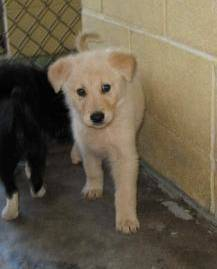

In [7]:
import cv2
from google.colab.patches import cv2_imshow  # Required for displaying images in Colab

# Assuming the dataset is unzipped in the "/content" directory
image_path = "/content/test_set/test_set/dogs/dog.4033.jpg"

# Load and display the image
img = cv2.imread(image_path)
cv2_imshow(img)


In [8]:
# Import the TensorFlow library
import tensorflow

# Import the Sequential model from Keras
from tensorflow.keras.models import Sequential
 # Initialize a Sequential model
model = Sequential()

In [9]:
#import required layers
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from keras.layers import BatchNormalization

In [10]:
# Add a Conv2D layer with 32 filters
model.add(Conv2D(input_shape=[32, 32, 3], filters=32, kernel_size=3,
                 padding='same', strides=(1, 1), activation='relu'))
# #Batch Normalization added
# model.add(BatchNormalization())

# Add a MaxPooling2D layer with a pool size of 2x2
model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))

#Add a Dropout layer with a dropout rate of 0.3 to prevent overfitting
model.add(Dropout(0.3))

# Add another Conv2D layer with 64 filter
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                 strides=(1, 1), activation='relu'))
# #Batch Normalization added
# model.add(BatchNormalization())

# Add another MaxPooling2D layer with a pool size of 2x2
model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))

# # Add a Dropout layer with a dropout rate of 0.3 to prevent overfitting
# model.add(Dropout(0.3))

# Add a Flatten layer to convert the 2D matrix into a 1D vector
model.add(Flatten())


In [11]:
# Import the Dense (fully connected) layer from Keras
from tensorflow.keras.layers import Dense

# Add a Dense layer with 128 units and ReLU activation function
model.add(Dense(units=128, activation='relu')) #no need to give input shape

# # Add another Dense layer with 64 units and ReLU activation function
# model.add(Dense(units=64, activation='relu'))

# Add another Dense layer with 32 units and ReLU activation function
model.add(Dense(units=32, activation='relu'))

# Add a final Dense layer with 1 unit and sigmoid activation function for binary classification
model.add(Dense(units=1, activation='sigmoid'))



In [12]:
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 4096)              0

In [13]:
# Compile the model with binary cross-entropy loss, Adam optimizer, and accuracy metric
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [14]:
# Import the ImageDataGenerator class from the tensorflow.keras.preprocessing.image module
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator with rescaling.
# Normalize the pixel values to the range [0, 1] by multiplying by 1/255.
datagen = ImageDataGenerator(rescale=1./255)


In [15]:
# Path to the directory containing the training data set
train_data_path = '/content/training_set/training_set'

# Path to the directory containing the test data set
test_data_path = '/content/test_set/test_set'


In [16]:
# Prepare the training set using ImageDataGenerator
training_set = datagen.flow_from_directory(
    directory=train_data_path,        # Path to the training data directory
    target_size=(32, 32),             # Resize all images to 32x32 pixels
    classes=['dogs', 'cats'],          # Specify the classes (dogs and cat)
    class_mode='binary',              # Set mode to binary classification (0 or 1)
    batch_size=20                     # Number of images per batch
)

Found 8005 images belonging to 2 classes.


In [17]:

# Prepare the testing set using ImageDataGenerator
testing_set = datagen.flow_from_directory(
    directory=test_data_path,         # Path to the testing data directory
    target_size=(32, 32),             # Resize all images to 32x32 pixels
    classes=['dogs', 'cats'],          # Specify the classes (dogs and cat)
    class_mode='binary',              # Set mode to binary classification (0 or 1)
    batch_size=20
)

Found 2023 images belonging to 2 classes.


In [18]:
# Print the length of the training set (number of batches)
print("Length of training set : {}".format(len(training_set)))

# Calculate and print the total number of training samples
# Use the batch size attribute of the training set to multiply by the number of batches
print("Number of training samples : {}".format(training_set.batch_size * len(training_set)))

# Print the length of the testing set (number of batches)
print("Length of testing set : {}".format(len(testing_set)))

# Calculate and print the total number of testing samples
# Use the batch size attribute of the testing set to multiply by the number of batches
print("Number of testing samples : {}".format(testing_set.batch_size * len(testing_set)))



Length of training set : 401
Number of training samples : 8020
Length of testing set : 102
Number of testing samples : 2040


In [19]:
from keras.callbacks import EarlyStopping

# Define an early stopping callback
earlystop = EarlyStopping(monitor='val_loss',     # Monitor the validation loss
                          patience=3,             # Number of epochs with no improvement after which training will be stopped
                          verbose=1,              # Verbosity mode
                          restore_best_weights=True)  # Restore model weights from the epoch with the best value

# Train the model using the training data generator with early stopping
history = model.fit(
    training_set,                 # The training data generator
    steps_per_epoch=400,          # Number of batches to process in each epoch (total training samples / batch size)
    epochs=20,                    # Number of epochs to train the model
    validation_data=testing_set,  # The testing data generator for validation
    validation_steps=102,         # Number of batches to process in each validation (total validation samples / batch size)
    callbacks=[earlystop]         # Include the early stopping callback in the training process
)


Epoch 1/20
400/400 [==============================] - 27s 41ms/step - loss: 0.6542 - accuracy: 0.6040 - val_loss: 0.6206 - val_accuracy: 0.6476
Epoch 2/20
400/400 [==============================] - 14s 35ms/step - loss: 0.5911 - accuracy: 0.6852 - val_loss: 0.5616 - val_accuracy: 0.7168
Epoch 3/20
400/400 [==============================] - 13s 34ms/step - loss: 0.5451 - accuracy: 0.7237 - val_loss: 0.5483 - val_accuracy: 0.7222
Epoch 4/20
400/400 [==============================] - 14s 34ms/step - loss: 0.5124 - accuracy: 0.7468 - val_loss: 0.5210 - val_accuracy: 0.7479
Epoch 5/20
400/400 [==============================] - 13s 33ms/step - loss: 0.4900 - accuracy: 0.7638 - val_loss: 0.5865 - val_accuracy: 0.6723
Epoch 6/20
400/400 [==============================] - 15s 37ms/step - loss: 0.4694 - accuracy: 0.7716 - val_loss: 0.5307 - val_accuracy: 0.7346
Epoch 7/20
400/400 [==============================] - 15s 37ms/step - loss: 0.4378 - accuracy: 0.7904 - val_loss: 0.4849 - val_accuracy:

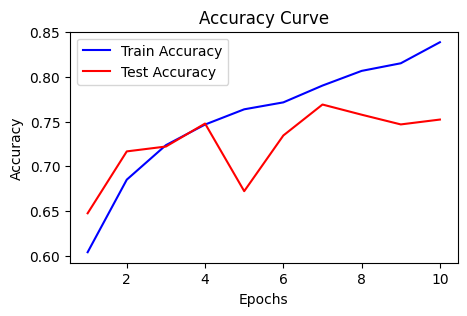

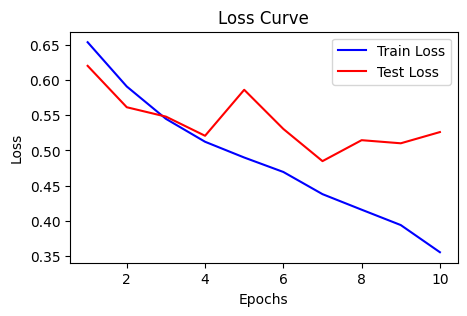

In [23]:
import matplotlib.pyplot as plt

# Extracting accuracy and loss values from the training history
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Generating a range of epoch counts
epoch_count = range(1, len(train_accuracy) + 1)

# Plotting the training and testing accuracy curves
plt.figure(figsize=(5, 3))
plt.plot(epoch_count, train_accuracy, 'b', label='Train Accuracy')
plt.plot(epoch_count, test_accuracy, 'r', label='Test Accuracy')
plt.xlabel('Epochs') # Setting the label for the x-axis
plt.ylabel("Accuracy") # Setting the label for the y-axis
plt.title("Accuracy Curve") # Setting the title of the plot
plt.legend() # Displaying the legend
plt.show() # Displaying the plot

# Plotting the training and testing loss curves
plt.figure(figsize=(5, 3))
plt.plot(epoch_count, train_loss, 'b', label='Train Loss')
plt.plot(epoch_count, test_loss, 'r', label='Test Loss')
plt.xlabel('Epochs') # Setting the label for the x-axis
plt.ylabel("Loss") # Setting the label for the y-axis
plt.title("Loss Curve") # Setting the title of the plot
plt.legend() # Displaying the legend
plt.show() # Displaying the plot


In [28]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions
y_pred_prob = model.predict(testing_set, steps=len(testing_set), verbose=1)

# Convert probabilities to binary labels
y_pred = (y_pred_prob > 0.5).astype(int)

# Get true labels
y_true = testing_set.classes

102/102 [==============================] - 5s 48ms/step


In [30]:
y_true

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [31]:
y_pred

array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [24]:
#Print classification report
print('Classification Report:')
print(classification_report(y_true, y_pred, target_names=['cats', 'dogs']))

Classification Report:
              precision    recall  f1-score   support

        cats       0.51      0.57      0.54      1012
        dogs       0.52      0.46      0.49      1011

    accuracy                           0.52      2023
   macro avg       0.52      0.52      0.51      2023
weighted avg       0.52      0.52      0.51      2023



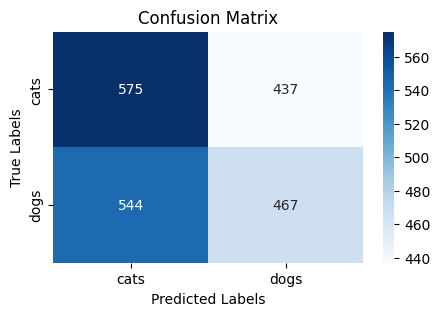

In [26]:

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn for better visualization
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['cats', 'dogs'], yticklabels=['cats', 'dogs'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()